**from google.colab** import drive kodu, Google Colab ortamında Google Drive'ı bağlamak için kullanılan bir koddur. Google Colab, bulut tabanlı bir Python kodlama ortamıdır ve Google Drive ile entegrasyonu sayesinde verilerinizi ve dosyalarınızı kolayca erişilebilir hale getirir.

**drive.mount("/content/drive")** kodu, /content/drive dizinine Google Drive'ı bağlamayı sağlar. Bu komutu çalıştırdığınızda, oturum açma işlemi gerçekleştirilir ve Google Drive'ınızdaki içeriklere erişim sağlamak için yetkilendirme istenir. Yetkilendirme tamamlandıktan sonra, Google Drive'ınızı /content/drive dizinine bağlanmış olarak kullanılabilir.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Bu kod bloğu, gerekli kütüphaneleri ve modülleri içe aktararak bir görüntü sınıflandırma modeli oluşturmak için kullanılır.

**cv2:** OpenCV (Açık Kaynak Bilgisayarlı Görü) kütüphanesini temsil eder. Görüntü işleme ve video analizi için kullanılır.


**numpy: **Sayısal hesaplamalar için kullanılan bir Python kütüphanesidir. Özellikle çok boyutlu diziler ve matrisler üzerinde işlemler yapmak için kullanılır.


**pandas:** Veri manipülasyonu ve analizi için kullanılan bir Python kütüphanesidir. Verileri düzenlemek, filtrelemek, dönüştürmek ve analiz etmek için kullanılır.


**matplotlib.pyplot:**  Veri görselleştirmesi için kullanılan bir Python kütüphanesidir. Grafikler, çizimler ve görseller oluşturmak için kullanılır.
sklearn.utils: Scikit-learn kütüphanesine ait yardımcı işlevleri içerir. Veri manipülasyonu ve model doğrulama işlemleri için kullanılır.


**sklearn.metrics:** Scikit-learn kütüphanesine ait metrikler ve performans ölçütleri içerir. Sınıflandırma ve regresyon modellerinin performansını değerlendirmek için kullanılır.


**tensorflow.keras.models:** TensorFlow kütüphanesi üzerindeki Keras API'sini temsil eder. Derin öğrenme modelleri oluşturmak için kullanılır.
tensorflow.keras.preprocessing.image: Görüntü verilerini işlemek ve model eğitimi için uygun hale getirmek için kullanılan Keras önişleme modülleri içerir.


**tensorflow.keras.layers:** Derin öğrenme modelinde kullanılan farklı katman türlerini içerir. Farklı konvolüsyon, havuzlama, tam bağlantılı ve düşürme katmanları gibi katmanları tanımlamak için kullanılır.


**tensorflow.keras.preprocessing:** Görüntü verilerini işlemek ve önişlemek için kullanılan Keras modüllerini içerir.


**tensorflow.keras.utils:** Keras ile kullanılan yardımcı fonksiyonları içerir. Özellikle veri dönüştürmeleri ve kodlamaları için kullanılır.


**tensorflow.keras.callbacks:** Model eğitimi sırasında geri çağırma işlevleri için kullanılan Keras modülünü içerir. Örneğin, model kontrol noktalarını kaydetmek veya erken durdurma gibi işlemleri yapmak için kullanılır.


**sklearn.model_selection:** Scikit-learn kütüphanesine ait model seçimi ve doğrulama için kullanılan işlevleri içerir.


**sklearn.preprocessing:** Veri önişleme işlemleri için kullanılan Scikit-learn modüllerini içerir.

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Bu kod, /content/drive/MyDrive/Colab Notebooks/SYZ/mias/all-mias/ dizinindeki görüntülere erişmek için kullanılan bir yol (path) olarak tanımlanmıştır.

Bu yol, belirli bir proje yapısına veya dosya düzenlemesine bağlı olarak değişebilir. Bu nedenle, kodun çalışabilmesi için belirtilen yolun doğru ve geçerli bir yol olduğundan emin olmanız gerekmektedir.

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/SYZ/mias/all-mias/'

Bu kod, "/content/drive/MyDrive/Colab Notebooks/SYZ/mias/Info.txt" dosyasını okuyarak bir DataFrame'e dönüştürür.

İlk olarak, pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SYZ/mias/Info.txt", sep=" ") kodu kullanılarak, "/content/drive/MyDrive/Colab Notebooks/SYZ/mias/Info.txt" dosyası virgülle ayrılmış bir metin dosyası olarak okunur ve info adlı bir DataFrame'e dönüştürülür.

Daha sonra, info = info.drop('Unnamed: 7', axis=1) koduyla 'Unnamed: 7' sütunu axis=1 parametresi kullanılarak DataFrame'den çıkarılır. Bu sütunun düşürülme nedeni, muhtemelen gereksiz veya boş bir sütun olmasıdır.

info.dropna(subset=["SEVERITY"], inplace=True) koduyla 'SEVERITY' sütunundaki boş değerlere sahip satırlar inplace=True parametresiyle DataFrame'den düşürülür. Bu işlem, 'SEVERITY' sütununun eksik veriler içermediğinden emin olmayı amaçlar.

Sonraki adımlarda, DataFrame'in index değerleri sıfırdan başlayacak şekilde sıfırlanır. İlk olarak, info.reset_index(inplace=True) kullanılarak mevcut index değerleri sıfırlanır. Daha sonra, info = info.drop([3], axis=0) koduyla 3. satır (axis=0) düşürülür. Ardından, tekrar info.reset_index(inplace=True) kullanılarak index değerleri sıfırdan başlayacak şekilde sıfırlanır.

Son olarak, info = info.drop('level_0', axis=1) ve info = info.drop('index', axis=1) kodlarıyla 'level_0' ve 'index' sütunları axis=1 parametresi kullanılarak DataFrame'den çıkarılır. Bu işlem, gereksiz sütunları düşürerek DataFrame'i temizlemeyi amaçlar.

In [4]:
# Read the dataframe
info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SYZ/mias/Info.txt", sep=" ")
info = info.drop('Unnamed: 7', axis=1)
info.dropna(subset=["SEVERITY"], inplace=True)
info.reset_index(inplace=True)
info = info.drop([3], axis=0)
info.reset_index(inplace=True)
info = info.drop('level_0', axis=1)
info = info.drop('index', axis=1)

Bu kodda, 'SEVERITY' sütunundaki kategorik etiketlerin sayısal değerlere dönüştürülmesi için LabelEncoder sınıfı kullanılır.

İlk olarak, LabelEncoder sınıfından bir örnek oluşturulur ve lb adıyla atanır.

Daha sonra, info['SEVERITY'] ifadesi kullanılarak 'SEVERITY' sütunundaki değerler seçilir. Bu sütundaki değerler, kategorik etiketlerin bulunduğu sütundur.

Son olarak, lb.fit_transform(info['SEVERITY']) ifadesi kullanılarak fit_transform yöntemi çağrılır ve 'SEVERITY' sütunundaki değerler sayısal değerlere dönüştürülür. Bu dönüşüm işlemi, kategorik etiketlere benzersiz sayısal değerler atar. Dönüştürülen değerler, 'SEVERITY' sütununda güncellenir.

In [5]:
# Encode 
lb = LabelEncoder()
info['SEVERITY'] = lb.fit_transform(info['SEVERITY'])


Bu kod parçası, görüntülerin dosya adlarını ve etiketlerini oluşturmak için kullanılır.

İlk olarak, boş bir liste olan img_name oluşturulur.

Daha sonra, info veri çerçevesindeki her bir 'SEVERITY' değeri için döngü oluşturulur. Her döngü adımında, img_name listesine, görüntünün dosya yolunu içeren bir öğe eklenir. Dosya yolu, path değişkeni ve 'REFNUM' sütunundaki değer kullanılarak oluşturulur. 'REFNUM' + '.pgm' şeklindeki dosya adı, her bir görüntünün dosya adını temsil etmektedir.

Son olarak, img_name listesi ve 'SEVERITY' sütunu label adıyla numpy dizisine dönüştürülür. Bu, görüntülerin dosya adlarını ve etiketlerini içeren img_name ve label dizilerinin elde edilmesini sağlar.

In [6]:
img_name = []
for i in range(len(info['SEVERITY'])):
    img_name.append(path + info['REFNUM'][i] + '.pgm')
img_name = np.array(img_name)
label = np.array(info['SEVERITY'])

Bu kod parçası, rastgele seçilen 25 görüntüyü görselleştirmek için kullanılır.

İlk olarak, bir matplotlib figürü oluşturulur ve boyutu (15, 10) olarak belirlenir. Bu figür içinde 5x5 alt grafiğe sahip bir düzen oluşturulacak.

Daha sonra, 25 kez bir döngü oluşturulur. Her döngü adımında, label dizisinin uzunluğu aralığında rastgele bir sayı (rand) oluşturulur. Bu sayı, rastgele bir görüntünün dizideki konumunu temsil eder.

Döngünün her adımında, ax adı verilen alt grafik oluşturulur ve plt.subplot fonksiyonu kullanılarak 5x5 düzenindeki ilgili konuma yerleştirilir.

Sonra, cv2.imread fonksiyonu kullanılarak rastgele seçilen görüntü yolu (img_name[rand]) okunur ve gri tonlamalı olarak yüklenir. Ardından, cv2.resize fonksiyonuyla görüntü boyutu (256, 256) olarak yeniden boyutlandırılır.

Görüntünün etiketine (label[rand]) bağlı olarak, grafikteki alt başlığı belirlenir. Etiketin değeri 1 ise 'B' (benign), değilse 'M' (malignant) olarak belirlenir.

Son olarak, plt.tight_layout() fonksiyonu çağrılarak grafik elemanları arasındaki boşlukları ayarlanır. plt.axis('off') fonksiyonu kullanılarak eksenler kapatılır ve plt.imshow fonksiyonuyla görüntü gösterilir.

Bu işlem 25 kez tekrarlandığında, rastgele seçilen 25 görüntü 5x5 alt grafik olarak figürde gösterilir. Oluşturulan figür random_25_image_fig.png adıyla kaydedilir.

Son olarak, view_25_random_image() fonksiyonu çağrılarak işlem gerçekleştirilir ve rastgele 25 görüntüyü içeren figür oluşturulur ve kaydedilir.

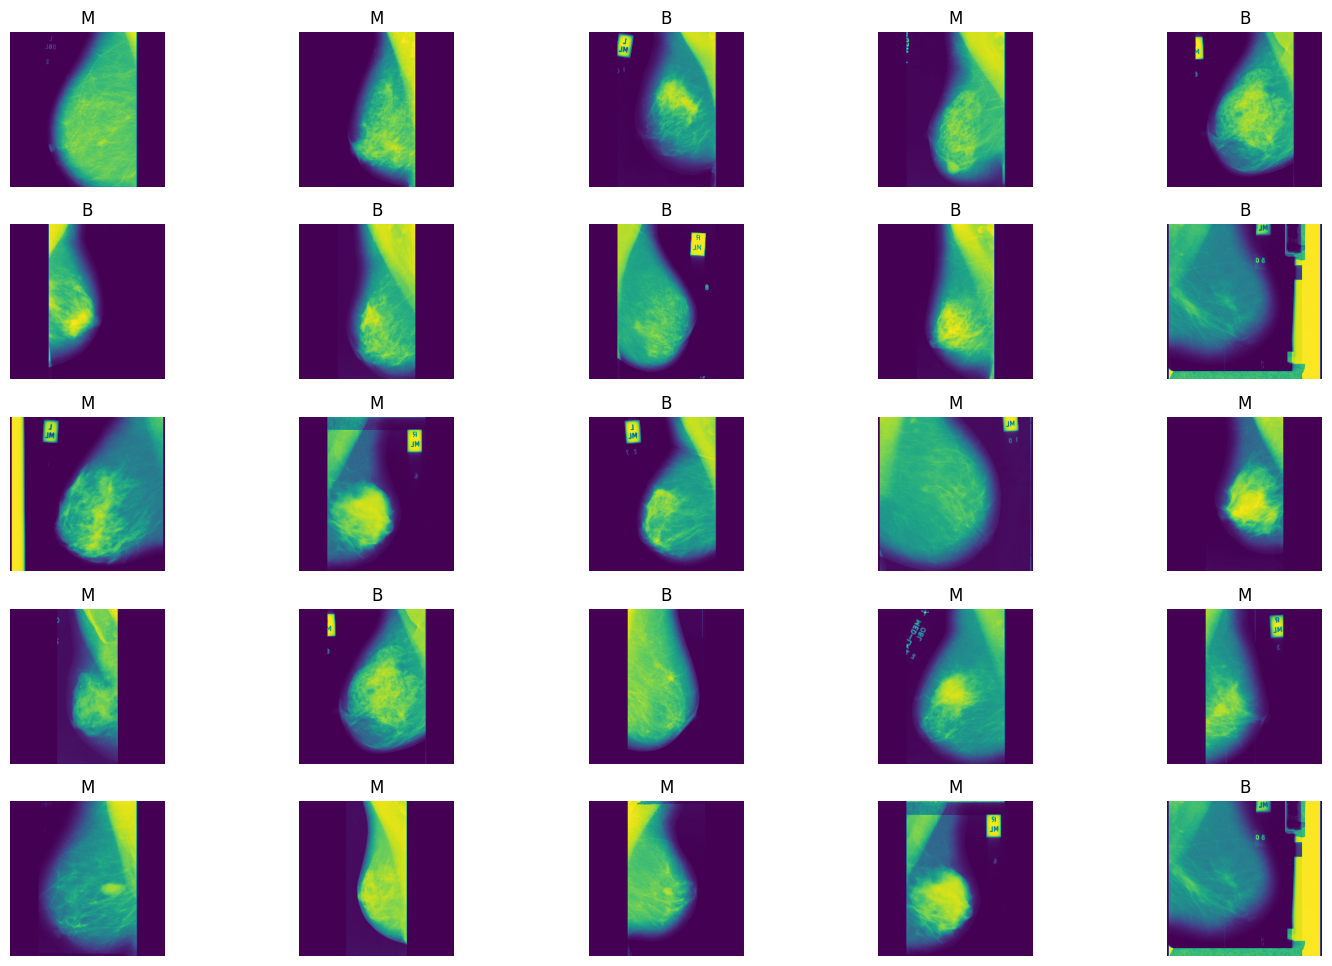

In [7]:
def view_25_random_image():
    fig = plt.figure(figsize=(15, 10))
    for i in range(25):
        rand = np.random.randint(0, len(label))
        ax = plt.subplot(5, 5, i+1)
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256, 256))
        if label[rand] == 1:
            plt.title('B')
        else:
            plt.title('M')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

view_25_random_image()

Bu kod parçası, görüntülere histogram eşitleme ve yatay olarak çevirme işlemlerini uyguladıktan sonra oluşan görüntülerden rastgele seçilen 5 tanesini görselleştirmek için kullanılır.

Öncelikle, img_path ve last_label listeleri boş olarak tanımlanır. Ardından, img_name dizisinin uzunluğu kadar bir döngü oluşturulur.

Her döngü adımında, görüntü okunur, yeniden boyutlandırılır ve histogram eşitleme uygulanır. Daha sonra, görüntü yatay olarak çevrilir ve ardından görüntüyü döndürme ve yansıtma işlemleri için döngü oluşturulur. Bu döngü, 0 ila 359 derece arasında her açı için görüntüyü döndürüp yansıtır ve bu işlem sonucunda elde edilen görüntüleri img_path listesine ekler.

Son olarak, last_label listesine etiketleri ekler. last_label listesi, label dizisinden alınan etiketleri aynı sırayla içerir.

Daha sonra, rastgele seçilen 5 görüntüye histogram eşitleme ve yatay olarak çevirme işlemleri uygulanır. Bunun için, random kütüphanesinin randint fonksiyonu kullanılır ve img_path listesinden rastgele bir görüntü seçilir. Seçilen görüntüye histogram eşitleme uygulanır ve yatay olarak çevrilir. Bu işlem 5 kez tekrarlanarak equalized_images listesine eşitlenmiş ve çevrilmiş görüntüler eklenir.

Son olarak, eşitlenmiş ve çevrilmiş görüntüler plt.imshow fonksiyonuyla görselleştirilir. Bu işlem için bir matplotlib figürü oluşturulur ve boyutu (15, 6) olarak belirlenir. Ardından, equalized_images listesindeki her görüntü, figüre ilgili konuma (fig.add_subplot) eklenir. Görüntünün etiketine (last_label[rand_idx]) bağlı olarak alt başlık belirlenir. Eksenler kapatılır ve görüntüler gri tonlamalı olarak gösterilir.

Son olarak, oluşturulan figür plt.show() fonksiyonuyla görüntülenir. Bu şekilde, histogram eşitleme ve yatay çevirme işlemleri uygulandıktan sonra oluşan rastgele 5 görüntü görselleştirilir.

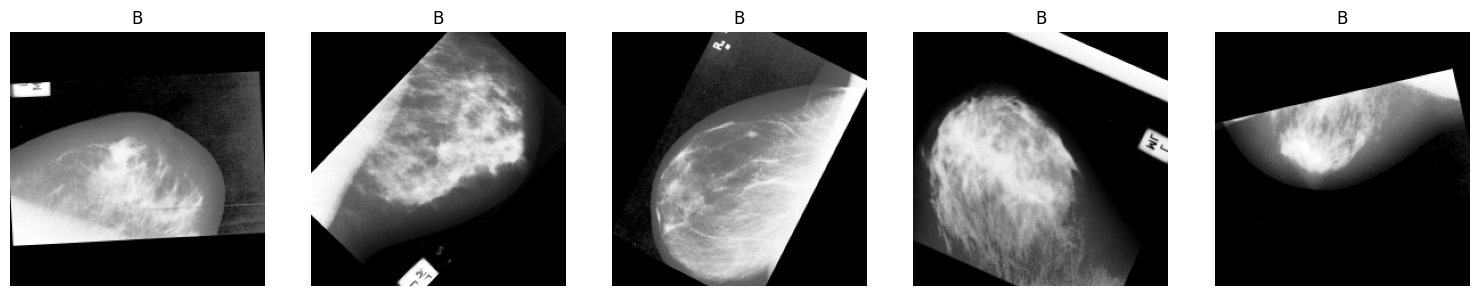

In [8]:
import random

img_path = []
last_label = []
for i in range(len(img_name)):
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224, 224))
    
    # Apply histogram equalization
    img = cv2.equalizeHist(img)
    
    # Flip horizontally
    img_flipped = cv2.flip(img, 1)  # 1 for horizontal flipping
    
    rows, cols = img.shape
    for angle in range(0, 360):
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        img_rotated = cv2.warpAffine(img, M, (224, 224))
        img_rotated_flipped = cv2.warpAffine(img_flipped, M, (224, 224))
        img_path.append(img_rotated)
        img_path.append(img_rotated_flipped)
        last_label.append(label[i])
        last_label.append(label[i])
        
last_label = np.array(last_label)
# Apply histogram equalization and horizontal flipping to the images
equalized_images = []
for i in range(5):
    rand_idx = random.randint(0, len(img_path)-1)
    img = img_path[rand_idx]
    equalized_img = cv2.equalizeHist(img)
    flipped_img = cv2.flip(equalized_img, 1)  # 1 for horizontal flipping
    equalized_images.append(flipped_img)

# Display the equalized and flipped images
fig = plt.figure(figsize=(15, 6))
for i, img in enumerate(equalized_images):
    ax = fig.add_subplot(1, 5, i+1)
    if last_label[rand_idx] == 1:
        plt.title('B')
    else:
        plt.title('M')
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(img, cmap='gray')

plt.show()

Bu kod parçası, görüntülere kontrast geliştirme, döndürme ve histogram eşitleme uygulandıktan sonra oluşan görüntülerden rastgele seçilen 5 tanesini görselleştirmek için kullanılır.

İlk olarak, boş img_path ve last_label listeleri tanımlanır. Daha sonra, img_name dizisinin uzunluğu kadar bir döngü oluşturulur.

Her döngü adımında, görüntü okunur ve yeniden boyutlandırılır. Ardından, kontrast geliştirme için CLAHE (Contrast Limited Adaptive Histogram Equalization) nesnesi oluşturulur ve bu nesneyle görüntü üzerinde kontrast geliştirme işlemi uygulanır.

Görüntünün satır ve sütun sayısı elde edilir ve 0 ila 359 derece arasında her açı için görüntü döndürülerek img_path listesine eklenir. Aynı zamanda, histogram eşitleme işlemi uygulanmış görüntü de döndürülerek img_path listesine eklenir. Her iki görüntü için de etiketleri (label[i]) last_label listesine eklenir.

Son olarak, last_label listesi bir NumPy dizisine dönüştürülür. Ardından, rastgele seçilen 5 görüntü için indeksler oluşturulur.

plt.imshow fonksiyonu kullanılarak rastgele seçilen görüntüler görselleştirilir. Bunun için, random.sample fonksiyonu kullanılarak img_path listesinden rastgele seçilen 5 indeks alınır. Oluşturulan figür boyutu (10, 8) olarak belirlenir.

Daha sonra, her rastgele seçilen görüntü için bir alt parcel (ax) oluşturulur. Görüntü ve etiketi (lbl) ilgili konuma eklenir. Etikete bağlı olarak başlık belirlenir. Eksenler kapatılır ve görüntüler gri tonlamalı olarak gösterilir.

Son olarak, oluşturulan figür plt.show() fonksiyonuyla görüntülenir. Bu şekilde, kontrast geliştirme, döndürme ve histogram eşitleme işlemleri uygulandıktan sonra oluşan rastgele 5 görüntü görselleştirilir.

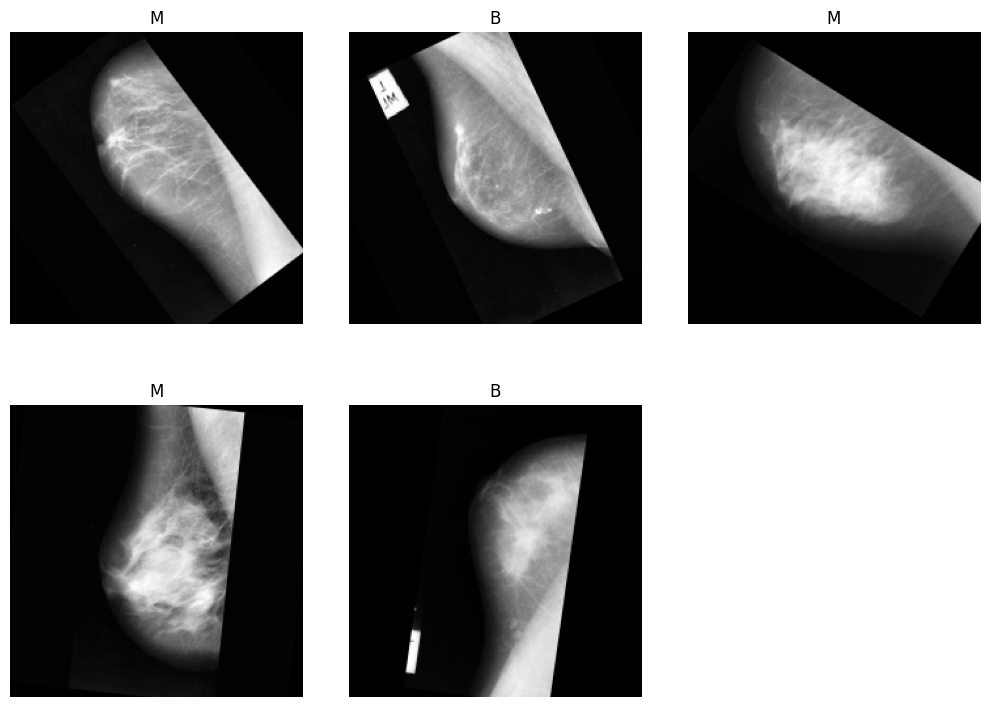

In [9]:
img_path = []
last_label = []
for i in range(len(img_name)):
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224, 224))
  
    clahe = cv2.createCLAHE(clipLimit=2.0) 
    img_contrast = clahe.apply(img)  
    
    rows, cols = img.shape
    for angle in range(0, 360):
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        img_rotated = cv2.warpAffine(img, M, (224, 224))
        img_rotated_contrast = cv2.warpAffine(img_contrast, M, (224, 224))
        img_path.append(img_rotated)
        img_path.append(img_rotated_contrast)
        last_label.append(label[i])
        last_label.append(label[i])
        
last_label = np.array(last_label)
import random

random_images = random.sample(range(len(img_path)), 5)

fig = plt.figure(figsize=(10, 8))
for i, img_index in enumerate(random_images):
    ax = plt.subplot(2, 3, i+1)
    img = img_path[img_index]
    lbl = last_label[img_index]
    if lbl == 1:
        plt.title('B')
    else:
        plt.title('M')
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()


Bu kod parçası, img_path ve last_label dizilerini eğitim ve test veri setlerine bölmek için train_test_split fonksiyonunu kullanır.

train_test_split fonksiyonunun ilk parametresi img_path dizisidir, ikinci parametresi ise last_label dizisidir. test_size parametresi ile test veri setinin oranı belirlenir. Bu örnekte, verilerin %25'i test veri setine ayrılır. random_state parametresi ise verilerin karıştırılması ve bölmelerin tekrarlanabilirliği için kullanılır.

Fonksiyonun çağrılması sonucunda, x_train, x_test, y_train ve y_test değişkenleri oluşturulur. x_train ve x_test değişkenleri, sırasıyla eğitim ve test görüntülerini içeren NumPy dizileridir. y_train ve y_test değişkenleri ise, sırasıyla eğitim ve test etiketlerini içeren NumPy dizileridir.

Son olarak, x_train.shape ifadesi, x_train dizisinin şeklini döndürür. Bu şekil, eğitim veri setindeki örnek sayısını ve her bir örneğin boyutunu gösterir.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size=0.25, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train.shape

(65880, 224, 224)

Bu kod parçası, x_train ve x_test dizilerinin şeklini yeniden şekillendirir.

x_train ve x_test, sırasıyla eğitim ve test görüntülerini içeren dizilerdir. Ancak, bu görüntülerin mevcut şekli (sayı_örnekleri, 224, 224), yani her bir görüntünün 224x224 piksel olduğunu ve sadece bir kanala sahip olduğunu gösterir.

np.reshape fonksiyonu, dizilerin şeklini yeniden düzenlemek için kullanılır. İlk parametre, yeniden şekillendirilecek dizi, ikinci parametre ise hedef şeklidir. Bu örnekte, hedef şekil, (sayı_örnekleri, 224, 224, 1) olarak belirtilmiştir. Bu, her bir görüntünün 224x224 piksel olduğunu ve 1 kanala sahip olduğunu gösterir.

Yani, np.reshape(x_train, (x_train.shape[0], 224, 224, 1)) ifadesi, x_train dizisinin şeklini (sayı_örnekleri, 224, 224, 1) olarak yeniden düzenler. Aynı şekilde, np.reshape(x_test, (x_test.shape[0], 224, 224, 1)) ifadesi de x_test dizisinin şeklini (sayı_örnekleri, 224, 224, 1) olarak yeniden düzenler.

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], 224, 224, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 224, 224, 1))

Bu kod, bir evrişimli sinir ağı (Convolutional Neural Network) modeli oluşturur ve modelin özetini yazdırır.

create_model fonksiyonu, Sequential sınıfından bir model oluşturur. Ardından, modelin katmanlarını ekler ve son olarak oluşturulan modeli döndürür.

Modelin katmanları şu şekildedir:

1. Conv2D katmanı: 32 filtre ile 3x3 boyutunda evrişim işlemi yapar. Aktivasyon fonksiyonu olarak "relu" kullanılır. Giriş şekli (input_shape), 224x224 boyutunda 1 kanala sahip görüntüler olarak belirtilir.


2. MaxPooling2D katmanı: 2x2 boyutunda maksimum havuzlama işlemi yapar.

3. İkinci bir Conv2D katmanı: 64 filtre ile 3x3 boyutunda evrişim işlemi yapar. Aktivasyon fonksiyonu olarak "relu" kullanılır.


4. İkinci bir MaxPooling2D katmanı: 2x2 boyutunda maksimum havuzlama işlemi yapar.


5. Üçüncü bir Conv2D katmanı: 64 filtre ile 3x3 boyutunda evrişim işlemi yapar. Aktivasyon fonksiyonu olarak "relu" kullanılır.

6. Üçüncü bir MaxPooling2D katmanı: 2x2 boyutunda maksimum havuzlama işlemi yapar.


7. Dördüncü bir Conv2D katmanı: 32 filtre ile 3x3 boyutunda evrişim işlemi yapar. Aktivasyon fonksiyonu olarak "relu" kullanılır.


8. Dördüncü bir MaxPooling2D katmanı: 2x2 boyutunda maksimum havuzlama işlemi yapar.


9. Beşinci bir Conv2D katmanı: 32 filtre ile 3x3 boyutunda evrişim işlemi yapar. Aktivasyon fonksiyonu olarak "relu" kullanılır.


10. Beşinci bir MaxPooling2D katmanı: 2x2 boyutunda maksimum havuzlama işlemi yapar.


11. Altıncı bir Conv2D katmanı: 32 filtre ile 3x3 boyutunda evrişim işlemi yapar. Aktivasyon fonksiyonu olarak "relu" kullanılır.


12. Altıncı bir MaxPooling2D katmanı: 2x2 boyutunda maksimum havuzlama işlemi yapar.


13. Flatten katmanı: Çıktıları düzleştirir.


14. Dense katmanı: 1 nöronlu tam bağlı (fully connected) katman. Aktivasyon fonksiyonu olarak "sigmoid" kullanılır.


model.summary() ifadesi, oluşturulan modelin özetini yazdırır. Özet, her katmanın adını, çıkış şeklini ve toplam parametre sayısını gösterir.



In [12]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

Bu kod, bir derin öğrenme modelinin eğitimini gerçekleştirir ve ardından modeli değerlendirir. İşleyiş aşağıdaki adımlar üzerinden gerçekleşir:

EarlyStopping geri araması, monitor='val_loss' parametresiyle belirtilen doğrulama kaybını takip eder. patience=6 parametresi, doğrulama kaybının 6 epoch boyunca azalmaması durumunda eğitimi durduracağını belirtir.
Model derlenir ve optimizer='adam' ile derleme yapılırken, kayıp fonksiyonu olarak binary_crossentropy kullanılır ve değerlendirme metriği olarak accuracy kullanılır.
model.fit fonksiyonu, eğitim verileri x_train ve y_train kullanılarak modelin eğitimini gerçekleştirir. validation_split=0.2 parametresi, verilerin %20'sinin doğrulama için ayrılmasını sağlar. epochs=25 ve batch_size=64 parametreleri, eğitim için kullanılacak epoch sayısı ve her adımda işlenecek örnek sayısını belirtir. callbacks=[early_stopping] ise erken durdurma geri aramasını ekler.
Eğitim tamamlandıktan sonra, model.evaluate fonksiyonu, modelin test verileri x_test ve y_test üzerindeki performansını değerlendirir.
loss_value ve accuracy sonuçları ekrana yazdırılır.
Bu şekilde, modelin eğitimi sırasında doğrulama kaybı 6 epoch boyunca azalmazsa eğitim duracak ve en iyi model seçilecektir. Elde edilen model, test verileri üzerindeki kayıp değerini (loss_value) ve doğruluk değerini (accuracy) hesaplayarak performansını raporlar.

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=6, verbose=1)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=25, batch_size=64, callbacks=[early_stopping])

loss_value, accuracy = model.evaluate(x_test, y_test)
print('Test_loss_value = ' + str(loss_value))
print('test_accuracy = ' + str(accuracy))

Epoch 1/25
824/824 [==============================] - 26s 17ms/step - loss: 0.6612 - accuracy: 0.5990 - val_loss: 0.5834 - val_accuracy: 0.6774
Epoch 2/25
824/824 [==============================] - 13s 15ms/step - loss: 0.4679 - accuracy: 0.7613 - val_loss: 0.4802 - val_accuracy: 0.7734
Epoch 3/25
824/824 [==============================] - 13s 15ms/step - loss: 0.2784 - accuracy: 0.8768 - val_loss: 0.1867 - val_accuracy: 0.9216
Epoch 4/25
824/824 [==============================] - 13s 15ms/step - loss: 0.1686 - accuracy: 0.9299 - val_loss: 0.1563 - val_accuracy: 0.9370
Epoch 5/25
824/824 [==============================] - 13s 15ms/step - loss: 0.1203 - accuracy: 0.9517 - val_loss: 0.1159 - val_accuracy: 0.9548
Epoch 6/25
824/824 [==============================] - 13s 15ms/step - loss: 0.0871 - accuracy: 0.9662 - val_loss: 0.0613 - val_accuracy: 0.9769
Epoch 7/25
824/824 [==============================] - 13s 15ms/step - loss: 0.0750 - accuracy: 0.9713 - val_loss: 0.0686 - val_accuracy:


Bu kod, eğitilmiş bir modelin test verileri üzerindeki performansını değerlendirir. İşleyiş aşağıdaki adımlarla gerçekleşir:

model.evaluate fonksiyonu, eğitilmiş modelin verilen test verileri (x_test ve y_test) üzerindeki performansını hesaplar.
loss_value ve accuracy değişkenleri, değerlendirme sonucunda elde edilen kayıp değerini ve doğruluk değerini saklar.
print fonksiyonu kullanılarak, elde edilen sonuçlar ekrana yazdırılır. Test_loss_value olarak kayıp değeri (loss_value) ve test_accuracy olarak doğruluk değeri (accuracy) görüntülenir.
Bu şekilde, eğitilmiş modelin test verileri üzerinde elde ettiği kayıp değeri ve doğruluk değeri ekrana yazdırılır.

In [14]:
loss_value, accuracy = model.evaluate(x_test, y_test)
print('Test_loss_value = ' + str(loss_value))
print('test_accuracy = ' + str(accuracy))

687/687 [==============================] - 3s 4ms/step - loss: 0.0783 - accuracy: 0.9728
Test_loss_value = 0.07825130969285965
test_accuracy = 0.9728142023086548



Bu kod, eğitim sürecinde elde edilen doğruluk ve kayıp değerlerini görselleştiren bir fonksiyon tanımlar. İşleyiş aşağıdaki adımlarla gerçekleşir:

visualize_result fonksiyonu, dört adet argüman alır: acc (eğitim doğruluk değerleri), val_acc (doğrulama doğruluk değerleri), loss (eğitim kayıp değerleri) ve val_loss (doğrulama kayıp değerleri).
Fonksiyon, iki adet alt grafik (subplot) içeren bir figür oluşturur. İki alt grafik, doğruluk ve kayıp değerlerini göstermek için kullanılır.
İlk alt grafikte, eğitim doğruluk değerleri (acc) ve doğrulama doğruluk değerleri (val_acc) çizgi grafikleri olarak plotlanır. Grafik başlığı, eksen etiketleri ve gösterim ayarları ayarlanır.
İkinci alt grafikte, eğitim kayıp değerleri (loss) ve doğrulama kayıp değerleri (val_loss) çizgi grafikleri olarak plotlanır. Grafik başlığı, eksen etiketleri ve gösterim ayarları ayarlanır.
Figür başlığı oluşturulur.
Oluşturulan figür, 'Accuracy_Loss_figure.png' adında bir dosyaya kaydedilir.
plt.tight_layout() fonksiyonu ile grafiklerin düzeni iyileştirilir.
Grafikler ekrana yazdırılır.
Bu şekilde, eğitim sürecinde elde edilen doğruluk ve kayıp değerlerinin görsel bir temsili oluşturulur ve ekrana yazdırılır.

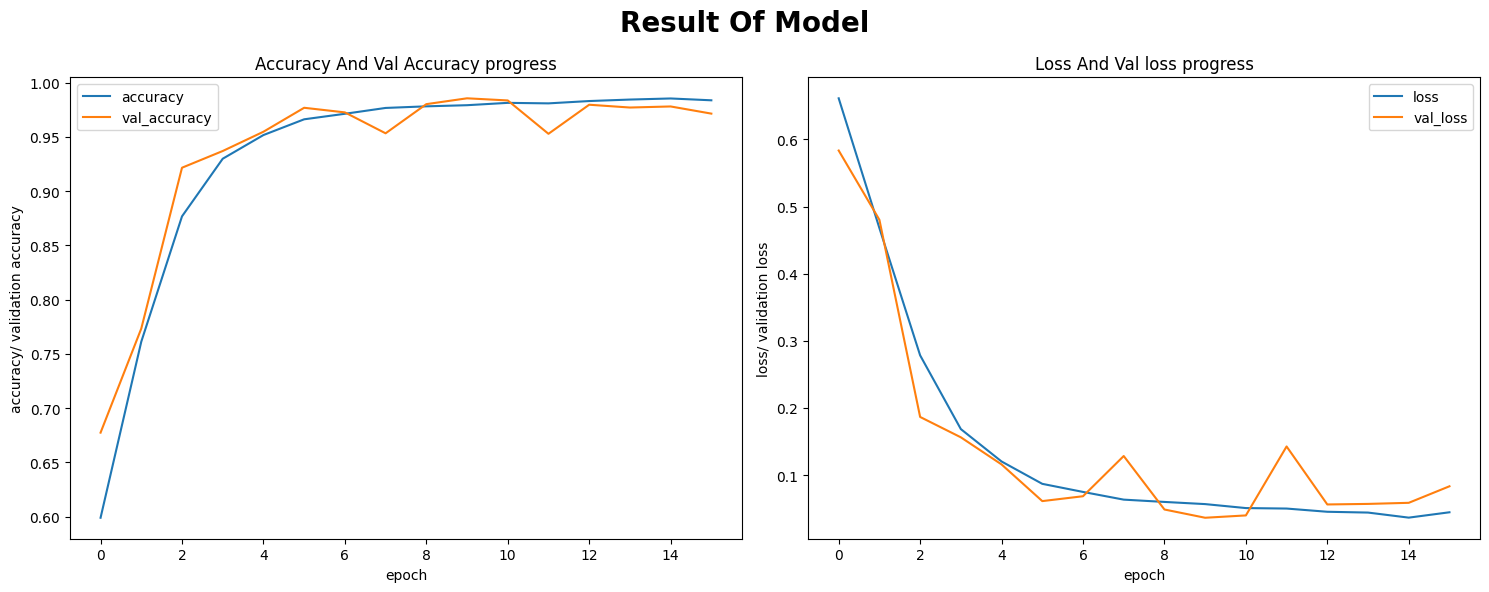

In [15]:
def visualize_result(acc, val_acc, loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharex=True)

    plot1 = ax1.plot(range(0, len(acc)), acc, label='accuracy')
    plot2 = ax1.plot(range(0, len(val_acc)), val_acc, label='val_accuracy')
    ax1.set(title='Accuracy And Val Accuracy progress', xlabel='epoch', ylabel='accuracy/ validation accuracy')
    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)), loss, label='loss')
    plot4 = ax2.plot(range(0, len(val_loss)), val_loss, label='val_loss')
    ax2.set(title='Loss And Val loss progress', xlabel='epoch', ylabel='loss/ validation loss')
    ax2.legend()

    fig.suptitle('Result Of Model', fontsize=20, fontweight='bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result(hist.history['accuracy'], hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])

y_pred = model.predict(x_test) kodu, eğitilmiş bir modelin, x_test veri kümesi üzerinde tahmin yapmasını sağlar. Aşağıdaki adımları takip eder:

model.predict() fonksiyonu, modelin verilen giriş veri kümesi (x_test) üzerinde tahmin yapmasını sağlar.
Model, her bir giriş örneği için bir tahmin değeri üretir.
y_pred değişkenine bu tahmin değerleri atanır.
y_pred değişkeni, x_test veri kümesindeki her bir örneğin model tarafından tahmin edilen çıktılarını içeren bir dizi veya tensördür.
Sonuç olarak, y_pred değişkeni, modelin x_test veri kümesindeki örnekler için yapmış olduğu tahminleri içerir. Bu tahminler genellikle olasılık değerleri veya sınıf etiketleri olarak ifade edilir.

In [16]:
y_pred = model.predict(x_test)

687/687 [==============================] - 2s 3ms/step


Bu kod, sklearn kütüphanesinden roc_curve ve roc_auc_score fonksiyonlarını kullanarak bir ROC eğrisi oluşturur ve görselleştirir. Aşağıdaki adımları takip eder:

model.predict(x_test) komutuyla model, x_test veri kümesi üzerinde tahminler yapar.
roc_curve(y_test, y_pred) fonksiyonu, gerçek sınıf etiketleri (y_test) ve tahmin edilen sınıf olasılıklarını (y_pred) kullanarak false positive rate (FPR), true positive rate (TPR) ve eşik değerlerini hesaplar.
roc_auc_score(y_test, y_pred) fonksiyonu, gerçek sınıf etiketleri ve tahmin edilen sınıf olasılıkları kullanılarak ROC eğrisinin altında kalan alanı (ROC AUC) hesaplar.
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) komutu, FPR ve TPR değerlerini kullanarak ROC eğrisini çizer.
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') komutu, rastgele tahmin eden bir sınıflandırıcının ROC eğrisini temsil eden bir çizgi çizer.
Diğer plt fonksiyonları ile eksen etiketleri, başlık ve açıklamalar eklenir.
plt.show() komutu, oluşturulan ROC eğrisini görüntüler.
Sonuç olarak, kod, eğitilmiş modelin performansını değerlendirmek için ROC eğrisini oluşturur ve görselleştirir. ROC eğrisi, sınıflandırma modelinin duyarlılık ve özgüllük performansını değerlendirmek için kullanılan yaygın bir ölçüttür.

687/687 [==============================] - 2s 3ms/step


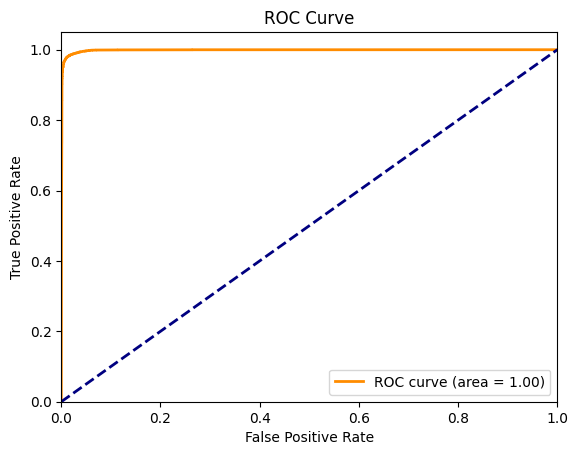

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()